In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Уравнение переноса:

$$u_t + u_x = 0 \\
u(x, 0) = \sin{\frac{4\pi x}{L}} \\
u(0, t) = u(L, t)$$


In [2]:
L = 20
T = 18
c = 1
CFL = [0.6, 1, 1.01]
h = 0.5

In [3]:
# генерация пространственной сетки
n_x = int(L / h) + 1
x = []
for i in range(n_x):
    x.append(i*h)
x = np.array(x)

In [4]:
# нач условие
def initial(x):
    return np.sin(4*np.pi*x / L)

![](pic1.png)

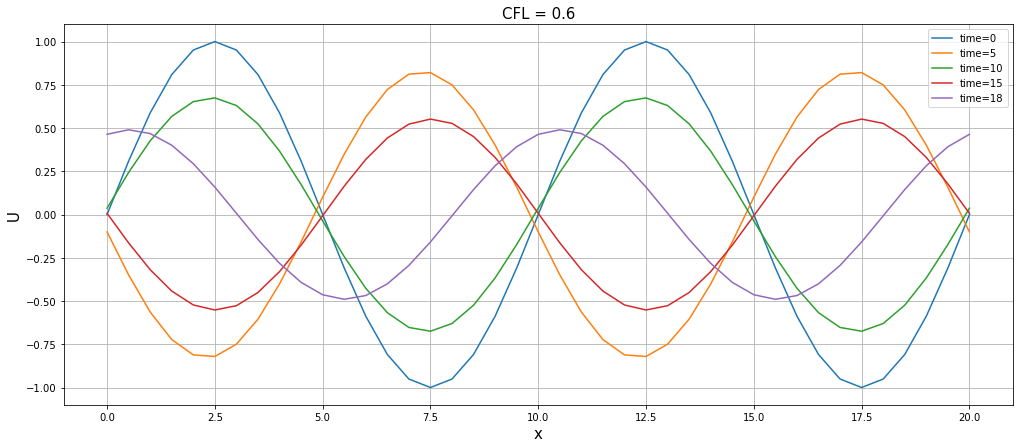

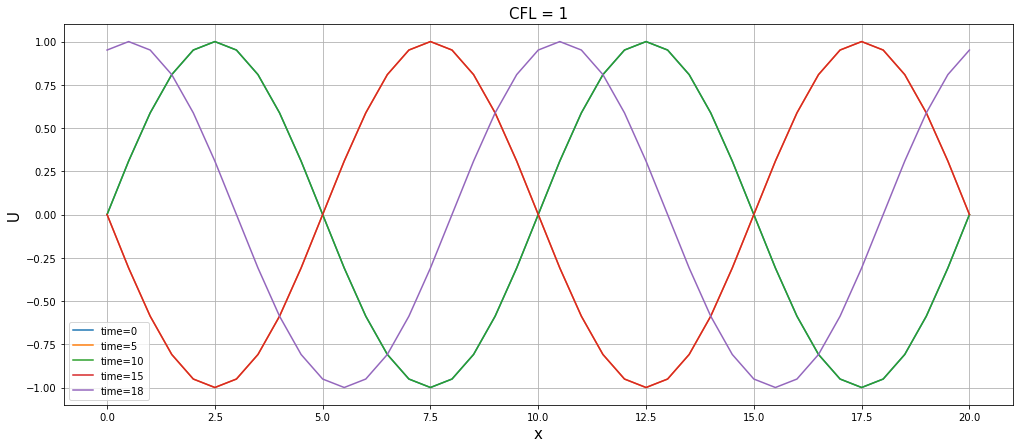

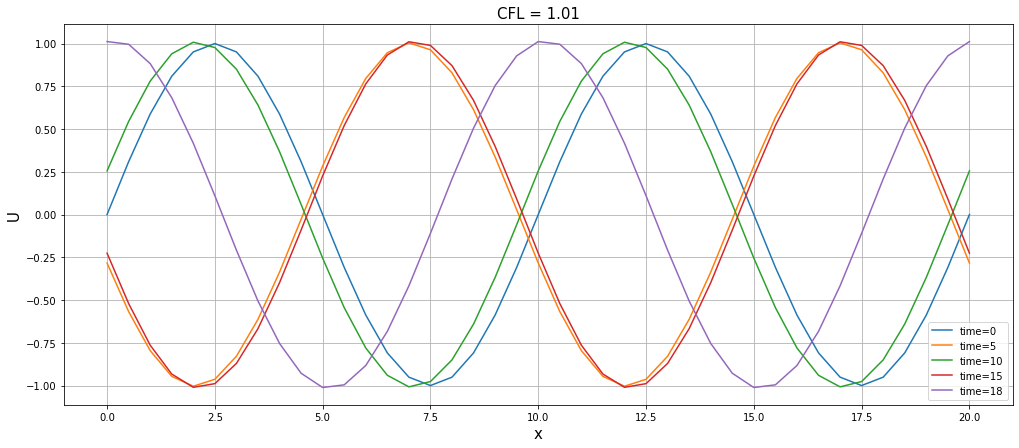

In [5]:
for kur_num in CFL:
    
    tau = kur_num * h
    
    # генерация сетки по времени:
    n_t = int(T / tau) + 1 
    t = []
    for i in range(n_t):
        t.append(i*tau)
    t = np.array(t)
    # генерация матрицы и задание нач условий:
    u = np.zeros((n_t, n_x))
    u[0, :] = initial(x) 
    
    # расчеты:
    for n in range(n_t-1):
        for m in range(1, n_x):
            u[n+1][m] = u[n][m] - (c*tau/h) * (u[n][m] - u[n][m-1])
        u[n+1, 0] = u[n+1, n_x-1]
        
    # визуализация:
    t_view = np.array([0, 5, 10, 15, 18])
    index = t_view / tau
    index = np.array(index, dtype='int')

    plt.figure(figsize=(17, 7))
    for j in range(len(index)):
        u_x = u[index[j]]
        plt.plot(x, u_x, label=f'time={t_view[j]}')
        
    plt.title(f'CFL = {kur_num}', fontsize=15)
    plt.xlabel('x', fontsize=15)
    plt.ylabel('U', fontsize=15)
    plt.legend()
    plt.grid()

![](pic2.png)

In [6]:
def f(y_1, y, y1, h, tau):
    """
    Расчетная формула разностной схемы
    y_1 <=> y[n, m-1]
    y <=> y[n, m]
    y1 <=> y[n, m+1]
    h, tau - шаги по x, t
    """
    res1 = y
    res2 = (tau/(2*h)) * (y1 - y_1)
    res3 = ((tau**2) / (2*h**2)) * (y1 - 2*y + y_1)
    ans = res1 - res2 + res3
    return ans

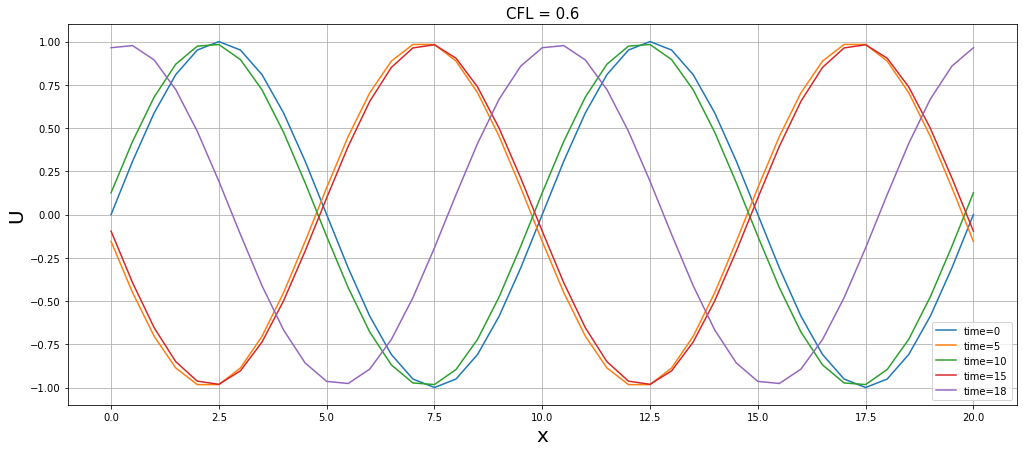

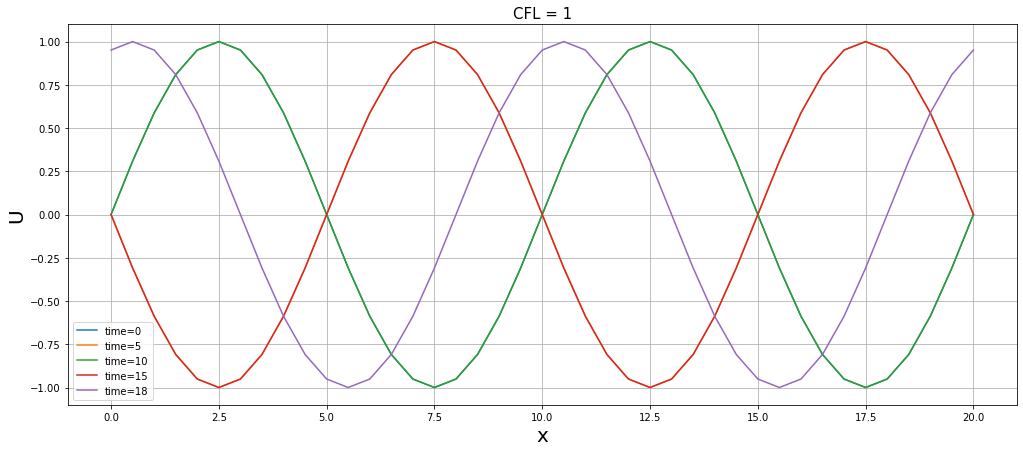

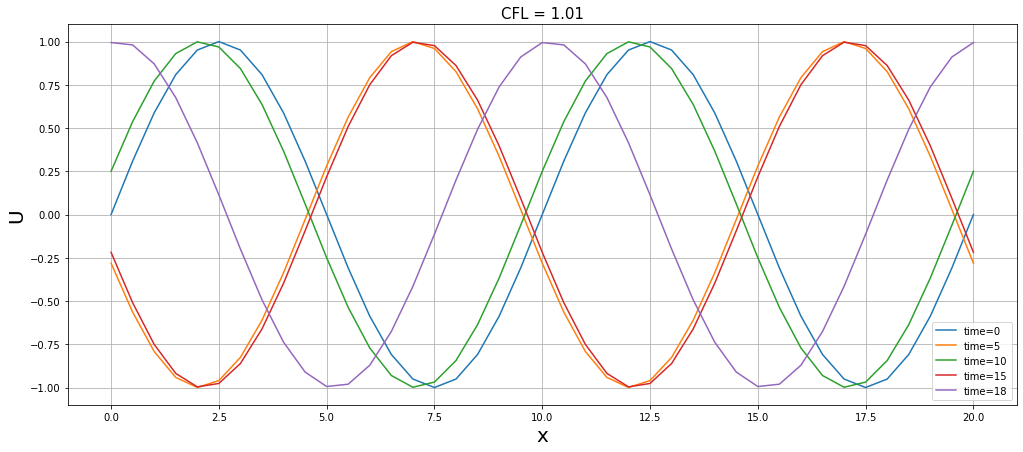

In [7]:
for kur_num in CFL:
    
    tau = kur_num * h
    
    # генерация сетки по времени:
    n_t = int(T / tau) + 1 
    t = []
    for i in range(n_t):
        t.append(i*tau)
    t = np.array(t)
    # генерация матрицы и задание нач условий:
    u = np.zeros((n_t, n_x))
    u[0, :] = initial(x) 
    
    # расчеты:
    for n in range(n_t-1):
        for m in range(1, n_x-1):
            u[n+1, m] = f(u[n, m-1], u[n, m], u[n, m+1], h, tau)
            
        u[n+1, -1] = f(u[n, n_x-2], u[n, n_x-1], u[n, 1], h, tau)
        u[n+1, 0] = f(u[n, n_x-2], u[n, 0], u[n, 1], h, tau)
        # u[n+1, 0] = u[n+1, n_x-1]

    # визуализация:
    t_view = np.array([0, 5, 10, 15, 18])
    index = t_view / tau
    index = np.array(index, dtype='int')

    plt.figure(figsize=(17, 7))
    for j in range(len(index)):
        u_x = u[index[j]]
        plt.plot(x, u_x, label=f'time={t_view[j]}')
        
    plt.title(f'CFL = {kur_num}', fontsize=15)
    plt.xlabel('x', fontsize=20)
    plt.ylabel('U', fontsize=20)
    plt.legend()
    plt.grid()